In [1]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

In [109]:
x = np.random.rand(32, 100000)
SR = 1250
start = np.array([12.5, 16.8, 32, 35, 40])
stop = start + 0.5
start_stop = np.vstack((start, stop)).T
start_stop

array([[12.5, 13. ],
       [16.8, 17.3],
       [32. , 32.5],
       [35. , 35.5],
       [40. , 40.5]])

In [13]:
check = np.zeros_like(times, dtype=bool)
fig, ax = plt.subplots(figsize=(3, 25))

In [25]:
np.mean(x, axis=1)
np.std(x, axis=1).mean()

0.28874201932322174

In [9]:
checkbox = widgets.Checkbox(
   value=False,
    description='Good ripple?',
    disabled=False,
    indent=False
)

In [124]:
def plot_lfp(lfp, start_stop_times, sid, ax, SR, chan_plot=None, buffer_frames=1250, good_ripple=False):
    """Set up stuff"""
    start_stop = start_stop_times[sid]
    if chan_plot is None:
        chan_plot = np.arange(lfp.shape[0])
    frame_start = int(start_stop[0] * SR - buffer_frames)
    frame_stop = int(start_stop[1] * SR + buffer_frames)
    lfp_snippet = lfp[chan_plot, frame_start:frame_stop]
    std = np.std(lfp_snippet).mean()
    
    time = np.arange(frame_start, frame_stop, 1)/SR
    
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    
    """Plot"""
    offset = 0
    for trace in lfp_snippet:
        ax.plot(time, trace + offset, 'b')
        offset += std*10
    
    ax.axvspan(start_stop[0], start_stop[1], color=[0, 1, 0, 0.4])
    
    ax.set_xlim([time.min(), time.max()])
    
#     """Update ripple evaluation"""
#     ripple_bool[sid] = good_ripple
    

In [75]:
def test_update(array):
    array[1] = 2

In [77]:
a = np.asarray([1, 1, 3, 4])
b = a
test_update(a)
b

array([1, 2, 3, 4])

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

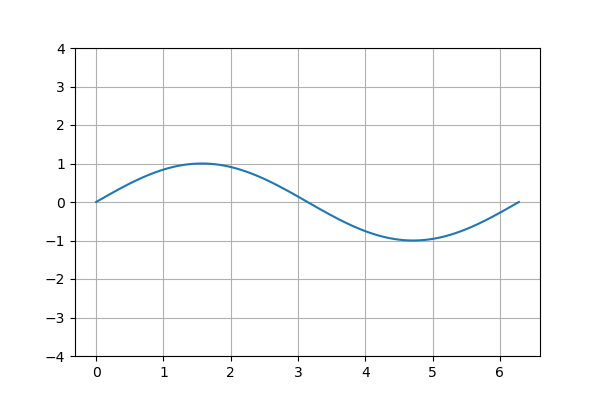

In [95]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 
 
def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
 
 
@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')

In [9]:
outputText = widgets.Text()
outputText

Text(value='')

In [10]:
inputText = widgets.Text()

def makeUpperCase(sender):
    outputText.value = inputText.value.upper()
    
inputText.on_submit(makeUpperCase)
inputText

Text(value='')

In [48]:
[float(val) for val in inputText.value.split(' ')]

[4.0, 6.0]

In [87]:
int_range = widgets.IntSlider()
output2 = widgets.Output()

display(int_range, output2)

def on_value_change(change):
    with output2:
        print(change['new'])

int_range.observe(on_value_change, names='value')

IntSlider(value=0)

Output()

In [100]:
"""Test out how python deals with global/local variables"""
x = [5]
def modify_x():
    x[0] = 4
    return x
print(f'x before function = {x}')
xf = modify_x()
print(f'xf from inside function = {xf}')
print(f'x after function = {x}')

x before function = [5]
xf from inside function = [4]
x after function = [4]


In [12]:
added_epochs

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 0 and the array at index 1 has size 2

In [26]:
s1 = pd.Series([5, 6, 7])
s2 = pd.Series([7, 8, 9])

df = pd.DataFrame([list(s1), list(s2)],  columns =  ["A", "B", "C"])
df

,A,B,C
0,5,6,7
1,7,8,9


In [27]:
df.loc[-1] = [2, 3, 4]  # adding a row
print(df)
df.index = df.index + 1  # shifting index
print(df)
# df = df.sort_index()  # sorting by index
df

    A  B  C
 0  5  6  7
 1  7  8  9
-1  2  3  4
   A  B  C
1  5  6  7
2  7  8  9
0  2  3  4


,A,B,C
1,5,6,7
2,7,8,9
0,2,3,4


In [55]:
import pandas as pd
swr_epochs = pd.DataFrame({'start': [0, 2, 4, 6, 8], 'stop': [0, 2.5, 4.5, 6.5, 8.5], 'label': 'auto'})
swr_epochs

,start,stop,label
0,0,0.0,auto
1,2,2.5,auto
2,4,4.5,auto
3,6,6.5,auto
4,8,8.5,auto


In [37]:
added_epoch

[5.5, 6.2, 'manual']

In [45]:
added_epoch = [5.5, 6.2]
added_epoch.append("manual")
np.max(np.where(added_epoch[0] > swr_epochs['start'])[0])
swr_epochs.loc[-1] = added_epoch
swr_epochs.sort_values("start", ignore_index=True)

,start,stop,label
0,0.0,0.0,auto
1,2.0,2.5,auto
2,4.0,4.5,auto
3,5.5,6.2,manual
4,6.0,6.5,auto
5,8.0,8.5,auto


In [ ]:
text = ["4.5"]

In [64]:
swr_epochs.sort_values("start", ignore_index=True, inplace=True)

In [68]:
swr_epochs

,start,stop,label
0,0.00,0.00,auto
1,2.00,2.50,auto
2,4.00,4.50,auto
3,5.50,5.75,manual
4,5.95,6.05,manual
5,6.00,6.50,auto
6,8.00,8.50,auto


In [74]:
add_epoch_box.layout

Layout()

In [100]:
slider.value

0

In [111]:
len(time) - 1

249999

interactive(children=(IntSlider(value=0, description='frame_start', max=249999), Output()), _dom_classes=('wid…

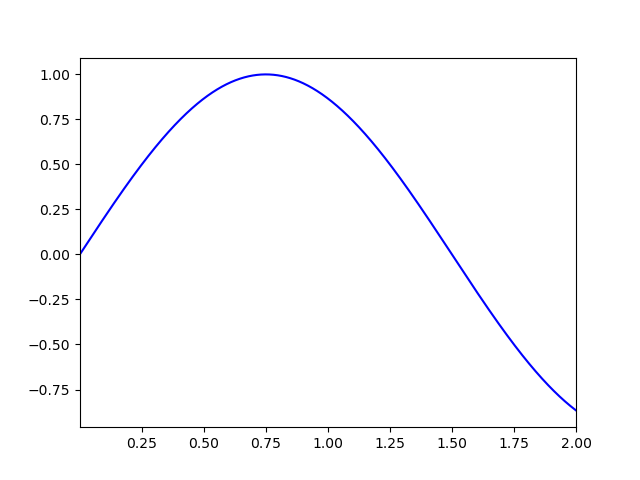

In [119]:
# Animate a sine wave!!!!
time = np.arange(0, 200, 1/1250)
wave = np.sin(60*time*2*np.pi/180)
time_step = 0.1
SR = 1250
plot_width_sec = 2

play = widgets.Play(
#     interval=10,
    value=0,
    min=0,
    max=len(time)-1,
    step=time_step*SR,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider(value=0, min=0, max=len(time)-1)
speed = widgets.FloatLogSlider(
    value=10,
    base=10,
    min=0, # max exponent of base
    max=10, # min exponent of base
    step=0.1, # exponent step
    description='Playback Speed'
)

_, ax = plt.subplots()

def update_speed(sender):
    play.step = speed.value

@widgets.interact(frame_start=slider, len_sec=widgets.fixed(plot_width_sec), SR=widgets.fixed(SR))
def plot_wave(frame_start, len_sec, SR):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    time_bool = np.bitwise_and(time > frame_start/SR, time <= (frame_start/SR + len_sec))
    time_plot, wave_plot = time[time_bool], wave[time_bool]
    ax.plot(time_plot, wave_plot, 'b-')
    ax.set_xlim((time_plot.min(), time_plot.max()))
    
speed.observe(update_speed)
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider, speed])

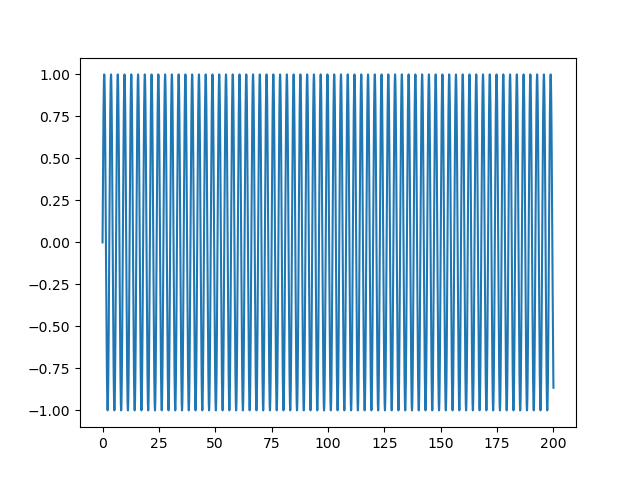

In [88]:
# Animate a sine wave!!!!
time = np.arange(0, 200, 1/1250)
wave = np.sin(60*time*2*np.pi/180)
_, ax = plt.subplots()
ax.plot(time, wave)

Text(value='Enter start/stop with space in between.', description='SWR to add:', layout=Layout(width='50%'))

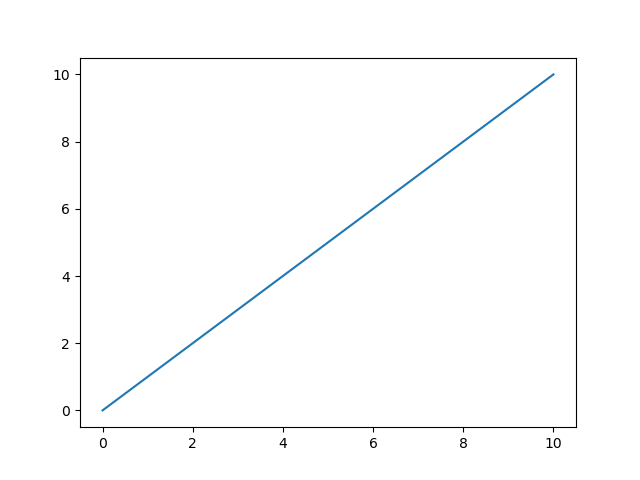

In [78]:
%matplotlib widget
fig, ax4 = plt.subplots()
ax4.plot([0, 10], [0, 10])

add_epoch_box = widgets.Text(description='SWR to add:', value='Enter start/stop with space in between.',
                            layout=widgets.Layout(width='50%'))

def update_epochs(sender):
    try:
        added_epoch = [float(val) for val in add_epoch_box.value.split(' ')]
        added_epoch.append("manual")
        np.max(np.where(added_epoch[0] > swr_epochs['start'])[0])
        swr_epochs.loc[-1] = added_epoch
        swr_epochs.sort_values("start", ignore_index=True, inplace=True)
        add_epoch_box.value = 'Successfully Added'
    except:
        add_epoch_box.value = "Data entered improperly. Enter start/stop with space in between." 
add_epoch_box.on_submit(update_epochs)
display(add_epoch_box)

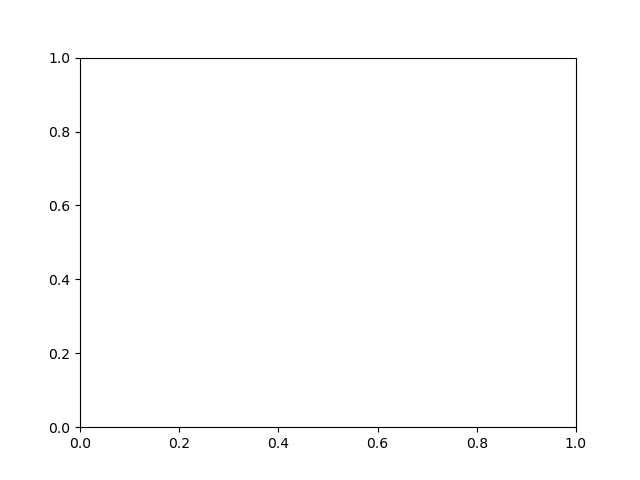

In [56]:
"""Create simple function to update the ripple_bool array when the box is checked.  Should automatically update
checkbox when you scroll through"""
%matplotlib widget
from ipyevents import Event
ripple_bool = np.zeros(5, dtype=bool)
ripple_bool[[1, 3]] = True
int_range = widgets.IntSlider(min=0, max=ripple_bool.shape[0] - 1, step=1, value=0)
good_ripple=widgets.Checkbox(value=False, description='Good ripple?', disabled=False, indent=False)
good_ripple.layout.border = '2px solid red'
# l = widgets.Label('Click or type on me!')
# l.layout.border = '2px solid red'

d = Event(source=good_ripple, watched_events=['keydown'])
fig, ax2 = plt.subplots()
# out = widgets.Output()
def update_checkbox(sender):
    good_ripple.value = bool(ripple_bool[int_range.value])
    
def update_array(sender):
    ripple_bool[int_range.value] = good_ripple.value
    
def handle_keypress(event):
    if event["key"] == "ArrowRight":
        print('test')
        int_range.value = int_range.value + 1 if int_range.value < int_range.max else int_range.min
    elif event["key"] == "ArrowLeft":
        int_range.value = int_range.value -1 if int_range.value > int_range.min else int_range.max
        
def handle_click(event):
    int_range.value = int_range.value + 1 if int_range.value < int_range.max else int_range.min
    
int_range.observe(update_checkbox)
good_ripple.observe(update_array)
d.on_dom_event(handle_keypress)
hb = widgets.HBox([int_range, good_ripple])
hb.layout.border = '2px solid green'
d2 = Event(source=hb, watched_events=['click'])
d2.on_dom_event(handle_click)
display(hb)

In [58]:
from ipyevents import Event
from IPython.display import display

# l = widgets.Label('Click or type on me!')
fig, ax = plt.subplots()
l = widgets.HBox([])
l.layout.border = '2px solid red'

h = widgets.HTML('Event info')
d = Event(source=l, watched_events=['click', 'keydown', 'mouseenter', 'touchmove'])
h2 = []

def handle_event(event):
    lines = ['{}: {}'.format(k, v) for k, v in event.items()]
    content = '<br>'.join(lines)
#     if event["key"] == 'ArrowRight':
    h.value = content
    h2.append(event["key"])
#     else:
#         h.value = 'None'
            

d.on_dom_event(handle_event)
                            
display(l, h)

HBox(layout=Layout(border='2px solid red'))

HTML(value='Event info')

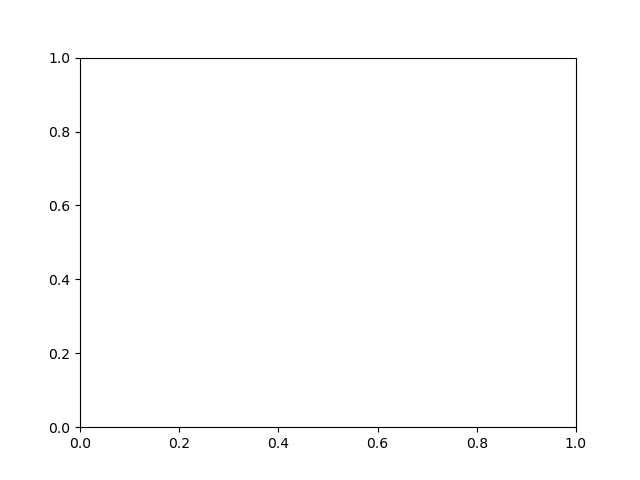

In [134]:
"""Option #1 for ripple widget!"""

%matplotlib widget
from ipywidgets import interact, fixed
fig, ax = plt.subplots()
ripple_bool = np.zeros(start_stop.shape[0], dtype=bool)
lfp = x
start_stop_times = start_stop
sid=widgets.IntSlider(min=0, max=4, step=1, value=0)
SR=1250
chan_plot=np.arange(23, 32)
buffer_frames=1250
good_ripple=widgets.Checkbox(
   value=False,
    description='Good ripple?',
    disabled=False,
    indent=False
)

def plot_lfp2(sender):
    """Set up stuff"""
    start_stop = start_stop_times[sid.value]
    global chan_plot
    if chan_plot is None:
        chan_plot = np.arange(lfp.shape[0])
    frame_start = int(start_stop[0] * SR - buffer_frames)
    frame_stop = int(start_stop[1] * SR + buffer_frames)
    lfp_snippet = lfp[chan_plot, frame_start:frame_stop]
    std = np.std(lfp_snippet).mean()
    
    time = np.arange(frame_start, frame_stop, 1)/SR
    
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    
    """Plot"""
    offset = 0
    for trace in lfp_snippet:
        ax.plot(time, trace + offset, 'b')
        offset += std*10
    
    ax.axvspan(start_stop[0], start_stop[1], color=[0, 1, 0, 0.4])
    
    ax.set_xlim([time.min(), time.max()])
    
#     """Update ripple evaluation"""
#     ripple_bool[sid.value] = good_ripple.value

    """Update checkbox"""
    good_ripple.value = bool(ripple_bool[sid.value])
    

def update_array(sender):
    ripple_bool[sid.value] = good_ripple.value

# def update_checkbox(sender):
#     good_ripple.value = bool(ripple_bool[sid.value])
    
good_ripple.observe(update_array)
sid.observe(plot_lfp2)
# display(ripple_bool)
# widgets.HBox([widgets.HBox([sid, good_ripple]), out])
widgets.HBox([sid, good_ripple])

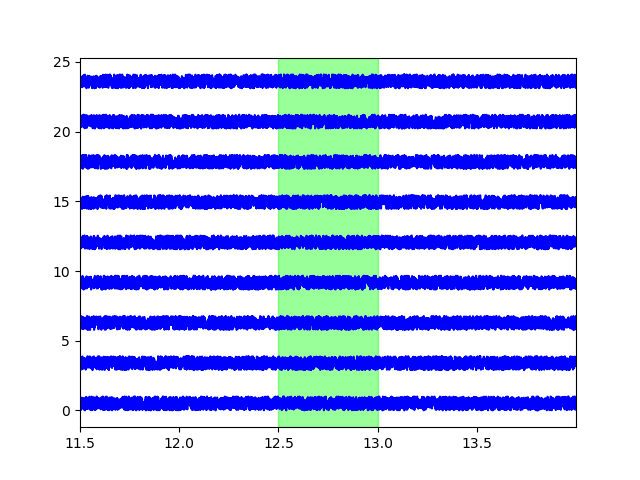

In [125]:
"""Option #2 for ripple widget"""
%matplotlib widget
from ipywidgets import interact, fixed
ripple_bool = []
fig, ax = plt.subplots()
ripple_bool = np.zeros(start_stop.shape[0], dtype=bool)
lfp = fixed(x)
start_stop_times = fixed(start_stop)
sid=widgets.IntSlider(min=0, max=4, step=1, value=0)
ax=fixed(ax)
SR=fixed(1250)
chan_plot=fixed(np.arange(23, 32))
buffer_frames=fixed(1250)
good_ripple=widgets.Checkbox(
   value=False,
    description='Good ripple?',
    disabled=False,
    indent=False
)
# ripple_bool = widgets.interactive(plot_lfp, lfp=fixed(x), start_stop_times=fixed(start_stop), 
            #ripple_bool=fixed(ripple_bool),
#          sid=widgets.IntSlider(min=0, max=4, step=1, value=0), ax=fixed(ax), SR=fixed(1250), 
#         chan_plot=fixed(np.arange(23, 32)), buffer_frames=fixed(1250), good_ripple=False)

out = widgets.interactive_output(plot_lfp, {'lfp': lfp, 'start_stop_times': start_stop_times, 'sid': sid, 
                                                    'ax': ax, 'SR': SR, 'chan_plot': chan_plot, 
                                                    'buffer_frames': buffer_frames, 
                                                    'good_ripple': good_ripple})

def update_array(sender):
    ripple_bool[sid.value] = good_ripple.value

def update_checkbox(sender):
    good_ripple.value = bool(ripple_bool[sid.value])
    
good_ripple.observe(update_array)
sid.observe(update_checkbox)
# display(ripple_bool)
widgets.HBox([widgets.HBox([sid, good_ripple]), out])

In [126]:
ripple_bool

array([False,  True, False, False,  True])

In [57]:
a = widgets.IntSlider(description='a')
b = widgets.IntSlider(description='b')
c = widgets.fixed(0)
def f(a, b, c):
    print('{}*{}*{}={}'.format(a, b, c, a*b*c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

widgets.HBox([widgets.VBox([a, b]), out])